# Reading Different Data Types

In [1]:
import os, csv

import numpy as np

import scipy.io.wavfile as wavfile
from scipy import signal

import torch
import imageio

import matplotlib.pyplot as plt

## 2D Images

In [2]:
img_arr = imageio.imread('../data/cat.jpg')
img_arr.shape

(1800, 1800, 3)

In [3]:
# Change layout from H x W x C to C x H X W
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [4]:
# Create a batch of images
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [5]:
data_dir = '../data/cat_imgs'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    batch[i] = img_t

In [6]:
batch = batch.float()
batch /= 255.0

In [7]:
batch = batch.float()
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

## 3D Images

In [8]:
dir_path = '../data/deep-learning-with-python-data/volumetric-dicom/2-LUNG 3.0  B70f-04083'
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%92/99 files (92.9%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 51/99  (51.599/99  (100.0%)


(99, 512, 512)

In [9]:
# Create channel dimension
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

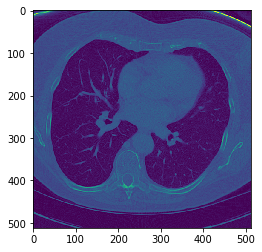

In [10]:
plt.imshow(vol_arr[50])

## Tabular Data

In [11]:
# Importing data
wine_path = '../data/deep-learning-with-python-data/tabular-wine/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [12]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [13]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [14]:
# Split x, y
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [15]:
target = wineq[:, -1].long()
target, target.shape

(tensor([6, 6, 6,  ..., 6, 7, 6]), torch.Size([4898]))

In [16]:
# Encoding
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [17]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        [6],
        ...,
        [6],
        [7],
        [6]])

In [18]:
# Normalization
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [19]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [20]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

In [21]:
# Predictions/Exploration
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [22]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [23]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


Good wines appear to have lower sulful content

In [24]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [25]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [26]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

## Time Series Data

In [27]:
# Load data
bikes_numpy = np.loadtxt('../data/deep-learning-with-python-data/bike-sharing-dataset/hour-fixed.csv', dtype=np.float32, delimiter=',', skiprows=1, converters={1: lambda x: float(x[8:10])})
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In [28]:
# Create batch of samples per 24 hours (N x C x L)
print(bikes.shape, bikes.stride())
print(bikes.is_contiguous())
print(bikes.shape[1] == bikes.stride()[0] and bikes.stride()[1] == 1) # Check if elements stored in order in storage

torch.Size([17520, 17]) (17, 1)
True
True


In [29]:
bikes.shape[0] / 24 % 2 == 0 # Check if number of rows can be split into 24 hours intervals

True

In [30]:
# Change view of tensor so that elements split by 24 hours (-1 means fill however many left), bikes.shape[1] contains number of columns
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride() # Order is in N x L x C

(torch.Size([730, 24, 17]), (408, 17, 1))

In [31]:
# Change order to N x C x L
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride() # Order is in N x C x L

(torch.Size([730, 17, 24]), (408, 1, 17))

In [32]:
# Creating a one-hot encoded predictor from good weather/bad weather column (using only first sequence)
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4) # Creating empty tensor for the day with enough columns for each possible category and enough rows for each hour
first_day[:, 9] # This shows all the weather ratings for each hour

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

In [33]:
weather_onehot.scatter_(dim=1, index=first_day[:, 9].unsqueeze(1).long() - 1, value=1.0) # One-hot encode first day results

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [34]:
torch.cat((bikes[:24], weather_onehot), 1)[:1] # Attaching vector to original tensor's first element

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [35]:
# Applying same technnique to whole original tensor N x C x L
print(daily_bikes.shape)
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 17, 24])


torch.Size([730, 4, 24])

In [36]:
daily_weather_onehot.scatter_(1, daily_bikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [37]:
# Concat new vectors to original tensor
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)
daily_bikes.shape

torch.Size([730, 21, 24])

In [38]:
# Alternatively - use variables as if they are continuous
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1.0) / 3.0

In [39]:
# Normalizing temperature columns (mapping range)
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min) / (temp_max - temp_min))

In [40]:
# Normalizaing temperature by subtracting mean and dividing standard deviation
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp)) / torch.std(temp))

## Text Data

In [41]:
# Data import
with open('../data/deep-learning-with-python-data/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [42]:
# Get one sentence
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [43]:
# Create empty tensor for encoding
letter_t = torch.zeros(len(line), 128) # There are 128 categories/encodings in ASCII
letter_t.shape

torch.Size([70, 128])

In [44]:
for i, letter in enumerate(line.lower().strip()):
    letter_i = ord(letter) if ord(letter) < 128 else 0 # ord returns ASCII number
    letter_t[i][letter_i] = 1

In [45]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0  # <1>
    letter_t[i][letter_index] = 1 # First index iterates each character in line, second index sets category

In [46]:
# One-hot Encode words
# Get words in line
def clean_words(i_str):
    punctuation = '.,;:"!?”“_-'
    word_list = i_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [47]:
# Create dictionary for entire text
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible'] # Shows total length of dictionary (number of unique words in book) and translating word 2 index

(7261, 3394)

In [48]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict)) # dim0 = each word in line dim1 = category
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))

print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


## Loading Audio Data

In [49]:
freq, wave = wavfile.read('../data/deep-learning-with-python-data/audio-chirp/1-100038-A-14.wav')
freq, wave

(44100, array([ -388, -3387, -4634, ...,  2289,  1327,    90], dtype=int16))

In [50]:
waveform = torch.from_numpy(wave.copy()).float()
waveform.shape

torch.Size([220500])

In [51]:
# Spectrograms
freq, time, spec = signal.spectrogram(wave, freq)
sp_mono = torch.from_numpy(spec)
sp_mono.shape

torch.Size([129, 984])

In [52]:
# Handling stereo sound
sp_left = sp_right = spec
sp_left_t = torch.from_numpy(sp_left)
sp_right_t = torch.from_numpy(sp_right)
sp_left_t.shape, sp_right_t.shape

(torch.Size([129, 984]), torch.Size([129, 984]))

In [53]:
# Combine left and right into new dimension
sp_t = torch.stack((sp_left_t, sp_right_t), dim=0) # C x F x T
sp_t.shape

torch.Size([2, 129, 984])

In [54]:
# Add channel for batch
batch_size = 5
batch_sp_t = torch.unsqueeze(sp_t, 0) # Reality - would stack multiple spectrograms
batch_sp_t = batch_sp_t.expand(batch_size, -1, -1, -1)
batch_sp_t.shape

torch.Size([5, 2, 129, 984])

In [55]:
# Transpose N x C x F x T(L) to T x N x C x F
batch_sp_t = batch_sp_t.permute(3, 0, 1, 2)
batch_sp_t.shape

torch.Size([984, 5, 2, 129])

In [56]:
# Line up data in storage
batch_sp_t = batch_sp_t.contiguous()
batch_sp_t.is_contiguous()

True

## Importing Video

In [57]:
# Data Import
reader = imageio.get_reader('../data/deep-learning-with-python-data/video-cockatoo/cockatoo.mp4')
meta = reader.get_meta_data()
meta

{'plugin': 'ffmpeg',
 'nframes': inf,
 'ffmpeg_version': '4.2.2 built with gcc 9.2.1 (GCC) 20200122',
 'codec': 'h264',
 'pix_fmt': 'yuv444p',
 'audio_codec': 'mp3',
 'fps': 20.0,
 'source_size': (1280, 720),
 'size': (1280, 720),
 'rotate': 0,
 'duration': 14.0}

In [58]:
# Create empty tensor
n_channels = 3
n_frames = reader.count_frames()
video = torch.empty(n_frames, n_channels, *meta['size'])

video.shape

torch.Size([280, 3, 1280, 720])

In [62]:
# Load tensor with data
for i, frame in enumerate(reader):
    frame = torch.from_numpy(frame).float()
    video[i] = torch.transpose(frame, 0, 2)